In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert the dataset to a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
iris_df['species'] = iris.target

# Replace target values with actual species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# creating the Features and target data
# Features (input data)
X = iris.data

# Target variable (output labels)
y = iris.target

In [ ]:
print(f'Min value of the first column {X[:, 0].min()-1}')
print(f'Max value of the first column {X[:, 0].max()+1}')
print(f'Min value of the second column {X[:, 1].min()-1}')
print(f'Max value of the second column {X[:, 1].max()+1}')

Min value of the first column 3.3
Max value of the first column 8.9
Min value of the second column 1.0
Max value of the second column 5.4


**Various cmaps:** 
- virids
- plasma
- inferno
- magma
- coolwarm 
- tab10
- RdYlBu
- jet

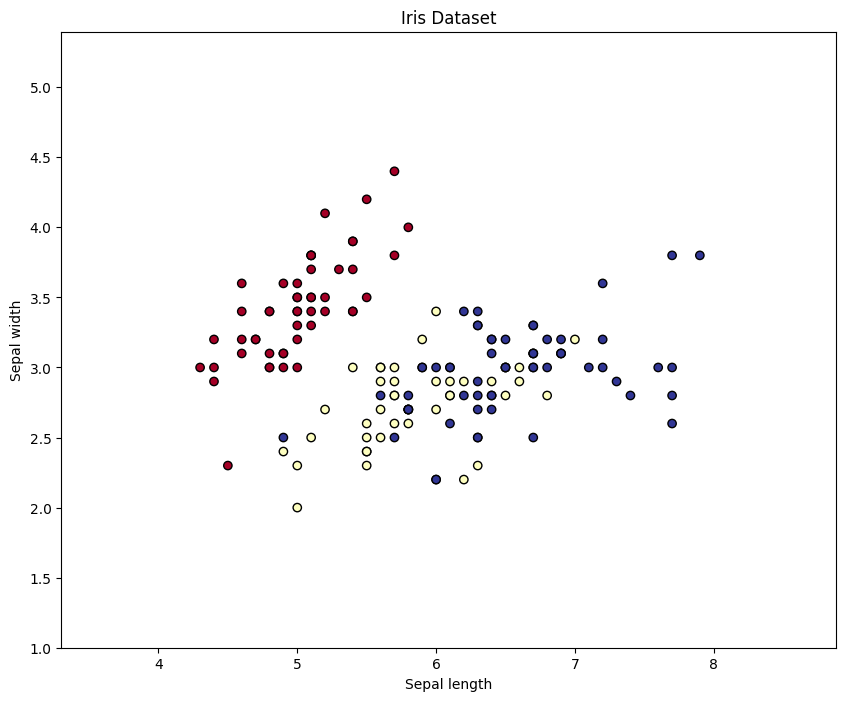

In [ ]:
# Create features and target data
X = iris.data[:, :2]  # Considering only the first two features for visualization
y = iris.target

# Plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # +/- are added for padding purpose. 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # +/- are added for padding purpose. 

# step size (h) for the meshgrid
h = (x_max / x_min) / 100 # used to create a fine grid of points for visualization.

# Creating a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Flattening the meshgrid points into a single array
X_plot = np.c_[xx.ravel(), yy.ravel()]

# Visualize the plot
plt.figure(figsize=(10, 8))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='k')
'''
Here 
    - c = This parameter specifies the color of each point in the scatter plot 
    based on the values of the target variable y
'''

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

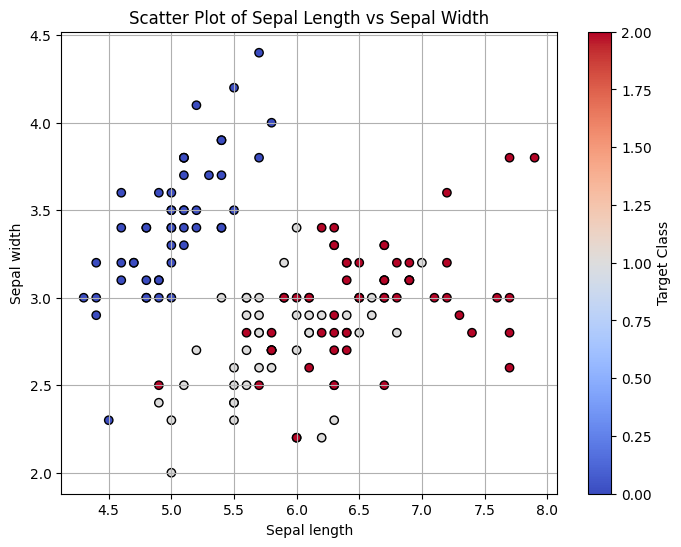

In [ ]:
# or we can just use following code
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.colorbar(label='Target Class')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Kernel Implementation

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


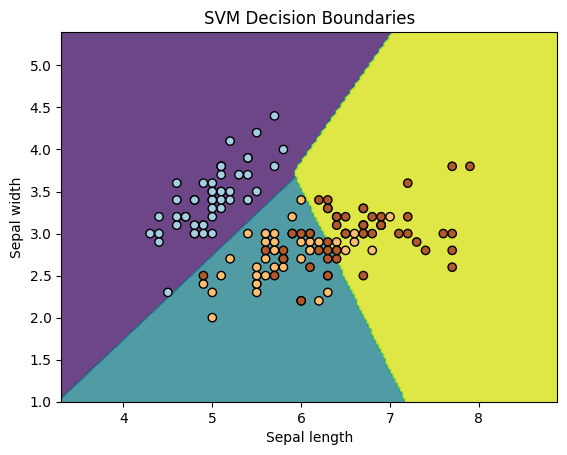

In [ ]:
# Plot decision boundaries
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot data points with different classes shaded or colored
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

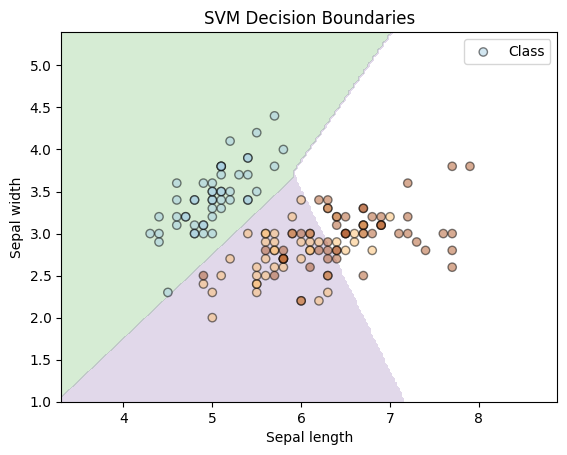

In [ ]:
# Plot decision boundaries with light color
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired, levels=[-1, 0, 1])

# Plot data points with different classes shaded with light colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', alpha=0.5, label='Class')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


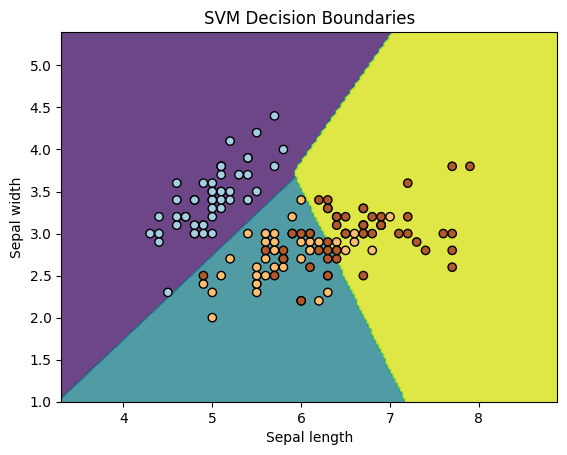

In [ ]:
# Plot decision boundaries
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot data points with different classes shaded or colored
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()

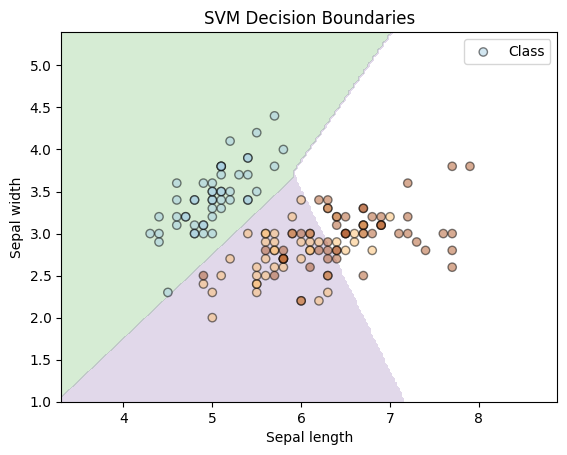

In [ ]:
# Plot decision boundaries with light color
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired, levels=[-1, 0, 1])

# Plot data points with different classes shaded with light colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', alpha=0.5, label='Class')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.legend()
plt.show()

### Sigmoid Kernel Implementation

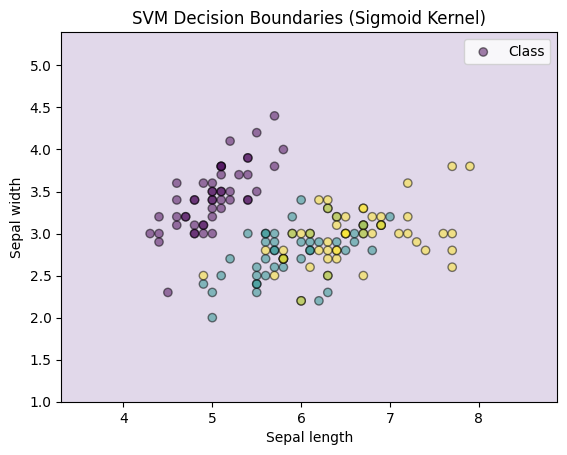

In [ ]:
# Create an instance of the SVM classifier with sigmoid kernel
svm_classifier = SVC(kernel='sigmoid', C=1.0)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Plot decision boundaries with light color
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired, levels=[-1, 0, 1])

# Plot data points with different classes shaded with light colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.5, label='Class')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries (Sigmoid Kernel)')
plt.legend()
plt.show()


### RBF Kernel Implementation

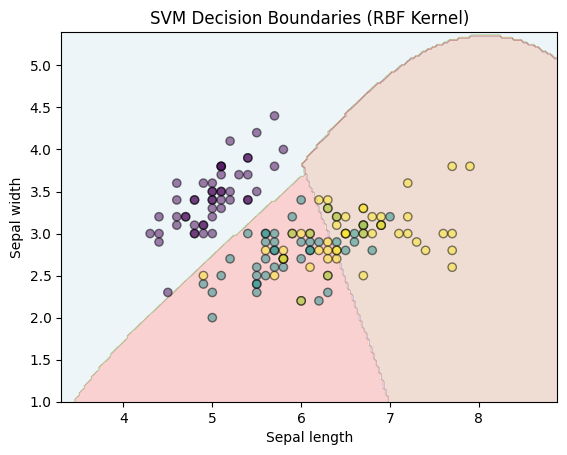

In [ ]:
# Create an instance of the SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', C=1.0)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Plot decision boundaries with light color
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

# Plot data points with different classes shaded with light colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries (RBF Kernel)')
plt.show()

### Polynomial Kernel Implementation

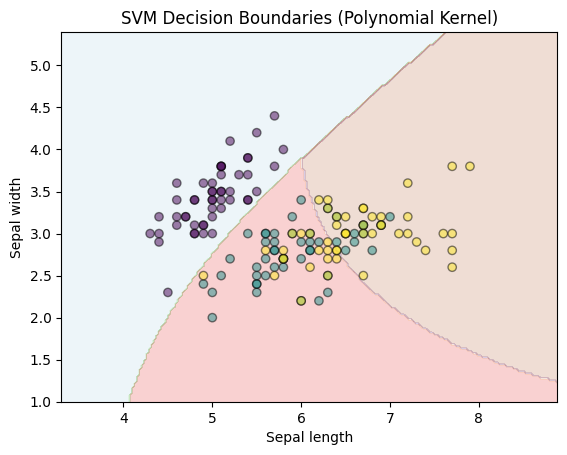

In [ ]:
# Create an instance of the SVM classifier with Polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3, C=1.0)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)

# Plot decision boundaries with light color
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

# Plot data points with different classes shaded with light colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries (Polynomial Kernel)')
plt.show()

## Choosing best SVM kernel

Choosing the best SVM kernel for a dataset depends on various factors such as the nature of the data, the complexity of the decision boundary, and the computational resources available. Here are some guidelines to help you choose the appropriate kernel:

1. **Linear Kernel (default)**:
   - Use when the data is linearly separable or when there are a large number of features compared to the number of samples.
   - Linear kernels are computationally efficient and can handle large datasets well.

2. **Polynomial Kernel**:
   - Use when the decision boundary is non-linear but can still be approximated by a polynomial function.
   - Adjust the degree parameter to control the complexity of the decision boundary. Higher degrees may lead to overfitting.

3. **RBF (Gaussian) Kernel**:
   - Use when the decision boundary is highly non-linear or when there is no prior knowledge about the data.
   - RBF kernels are more flexible and can capture complex relationships between data points.
   - Adjust the gamma parameter to control the smoothness of the decision boundary. Higher values of gamma lead to more complex decision boundaries and may result in overfitting.

4. **Sigmoid Kernel**:
   - Use when the data is not linearly separable and exhibits similarities with sigmoid functions.
   - Sigmoid kernels are less commonly used compared to linear, polynomial, and RBF kernels.

To choose the best kernel, you can try multiple kernels and evaluate their performance using techniques such as cross-validation and grid search:

- **Cross-validation**: Split the data into training and validation sets, train the SVM models with different kernels on the training set, and evaluate their performance on the validation set. Choose the kernel with the highest accuracy or other suitable evaluation metric.

- **Grid Search**: Perform a grid search over a predefined range of hyperparameters (e.g., degree for polynomial kernel, gamma for RBF kernel) using cross-validation to find the optimal combination of hyperparameters and kernel.

- **Domain Knowledge**: Consider the characteristics of your dataset and any prior knowledge about the problem domain. For example, if you know that the decision boundary is likely to be non-linear, you may start with a polynomial or RBF kernel.

It's essential to balance model performance with computational efficiency, especially for large datasets, as some kernels may require more computational resources than others. Experiment with different kernels and hyperparameters to find the one that achieves the best balance of performance and efficiency for your specific dataset and problem.

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Create an instance of the SVM classifier with linear kernel
svm_linear = SVC(kernel='linear')

# Cross-validation
scores = cross_val_score(svm_linear, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# Grid search
param_grid = {'C': [0.1, 1, 10, 100]}  # Define the grid of hyperparameters
grid_search = GridSearchCV(svm_linear, param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Cross-validation scores: [0.73333333 0.83333333 0.76666667 0.86666667 0.83333333]
Mean accuracy: 0.8066666666666666
Best parameters: {'C': 10}
Best cross-validation score: 0.8133333333333332


Here C is the regularization parameter C
- `cross_val_score` is used to perform cross-validation and evaluate the accuracy of the linear SVM model.
- `GridSearchCV` is used to perform grid search with cross-validation and find the best combination of hyperparameters (in this case, the regularization parameter C).
- `param_grid` defines the grid of hyperparameters to search over.
The best hyperparameters and corresponding cross-validation score are printed at the end.

**Explannation:** 
- The mean accuracy across all folds is approximately 80.67%.
- After performing grid search, the best parameter for the regularization parameter C is found to be 10, with a corresponding cross-validation score of approximately 81.33%. This indicates that the linear SVM model with C=10 performs slightly better than other values of C tested during grid search.
- Overall, these results suggest that the linear SVM model performs reasonably well on your dataset, with an accuracy of around 80.67% and further improved performance when using C=10.

**So with cross-validation and Grid search, we can SVM linear classifier:**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Create an instance of the SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear')

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.70833333 0.75       0.875      0.83333333 0.75      ]
Mean cross-validation score: 0.7833333333333334


In [ ]:
# Define the grid of hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 1}
Best cross-validation score: 0.7833333333333334


In [ ]:
# Train the SVM classifier with the best parameters
best_svm_classifier = grid_search.best_estimator_
best_svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9


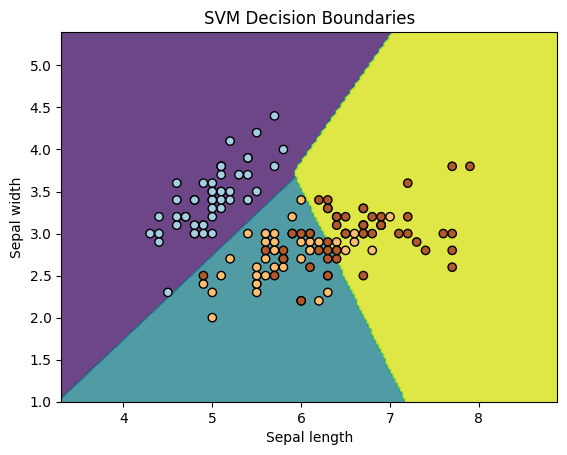

In [ ]:
# Plot decision boundaries
Z = best_svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot data points with different classes shaded or colored
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()
